In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
sns.set_theme()

In [2]:
df = pd.read_csv('../datasets/competition_dataset/dev.tsv', sep='\t')

df = df.drop_duplicates()

df.head()

,country,description,designation,province,region_1,region_2,variety,winery,quality
0,France,"A creamed pear wine, with an attractive tang o...",Brut Blanc de Blancs,Alsace,Crémant d'Alsace,NaN,Pinot Blanc,Lucien Albrecht,45.0
1,US,"Simple and dry, this Cabernet has modest black...",NaN,California,Paso Robles,Central Coast,Cabernet Sauvignon,Castle Rock,31.0
2,US,"This lovely wine captures the floral, perfumed...",NaN,Oregon,Willamette Valley,Willamette Valley,Gewürztraminer,Château Bianca,35.0
3,Portugal,"The aromas are the thing here, as so often wit...",NaN,Alentejano,NaN,NaN,Touriga Nacional,Herdade do Esporão,41.0
4,Italy,"This is an interesting, outright strange wine ...",Natì,Southern Italy,Pompeiano,NaN,Coda di Volpe,Sorrentino,37.0


In [3]:
top_175_province_df = df[df.province.isin(df.province.value_counts().head(175).index)]
top_175_province_df

,country,description,designation,province,region_1,region_2,variety,winery,quality
0,France,"A creamed pear wine, with an attractive tang o...",Brut Blanc de Blancs,Alsace,Crémant d'Alsace,NaN,Pinot Blanc,Lucien Albrecht,45.0
1,US,"Simple and dry, this Cabernet has modest black...",NaN,California,Paso Robles,Central Coast,Cabernet Sauvignon,Castle Rock,31.0
2,US,"This lovely wine captures the floral, perfumed...",NaN,Oregon,Willamette Valley,Willamette Valley,Gewürztraminer,Château Bianca,35.0
3,Portugal,"The aromas are the thing here, as so often wit...",NaN,Alentejano,NaN,NaN,Touriga Nacional,Herdade do Esporão,41.0
4,Italy,"This is an interesting, outright strange wine ...",Natì,Southern Italy,Pompeiano,NaN,Coda di Volpe,Sorrentino,37.0
...,...,...,...,...,...,...,...,...,...
120730,France,"Moët's style, with its delicious forward fruit...",Brut,Champagne,Champagne,NaN,Champagne Blend,Moët & Chandon,59.0
120732,Portugal,"This is soft, young and fruity, with a dominat...",PV Ruby Port Collections,Port,NaN,NaN,Port,Barão de Vilar,42.0
120733,US,"Showing ripe peach, pineapple and honeysuckle ...",NaN,California,Yountville,Napa,Chardonnay,Liparita,46.0
120735,US,A first release from this new Walla Walla wine...,NaN,Washington,Walla Walla Valley (WA),Columbia Valley,Syrah,Delmas,58.0


In [40]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
X = enc.fit_transform(top_175_province_df.country.to_numpy().reshape(-1, 1))
y = top_175_province_df.quality.to_numpy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.09483462788926511

<AxesSubplot:xlabel='quality', ylabel='province'>

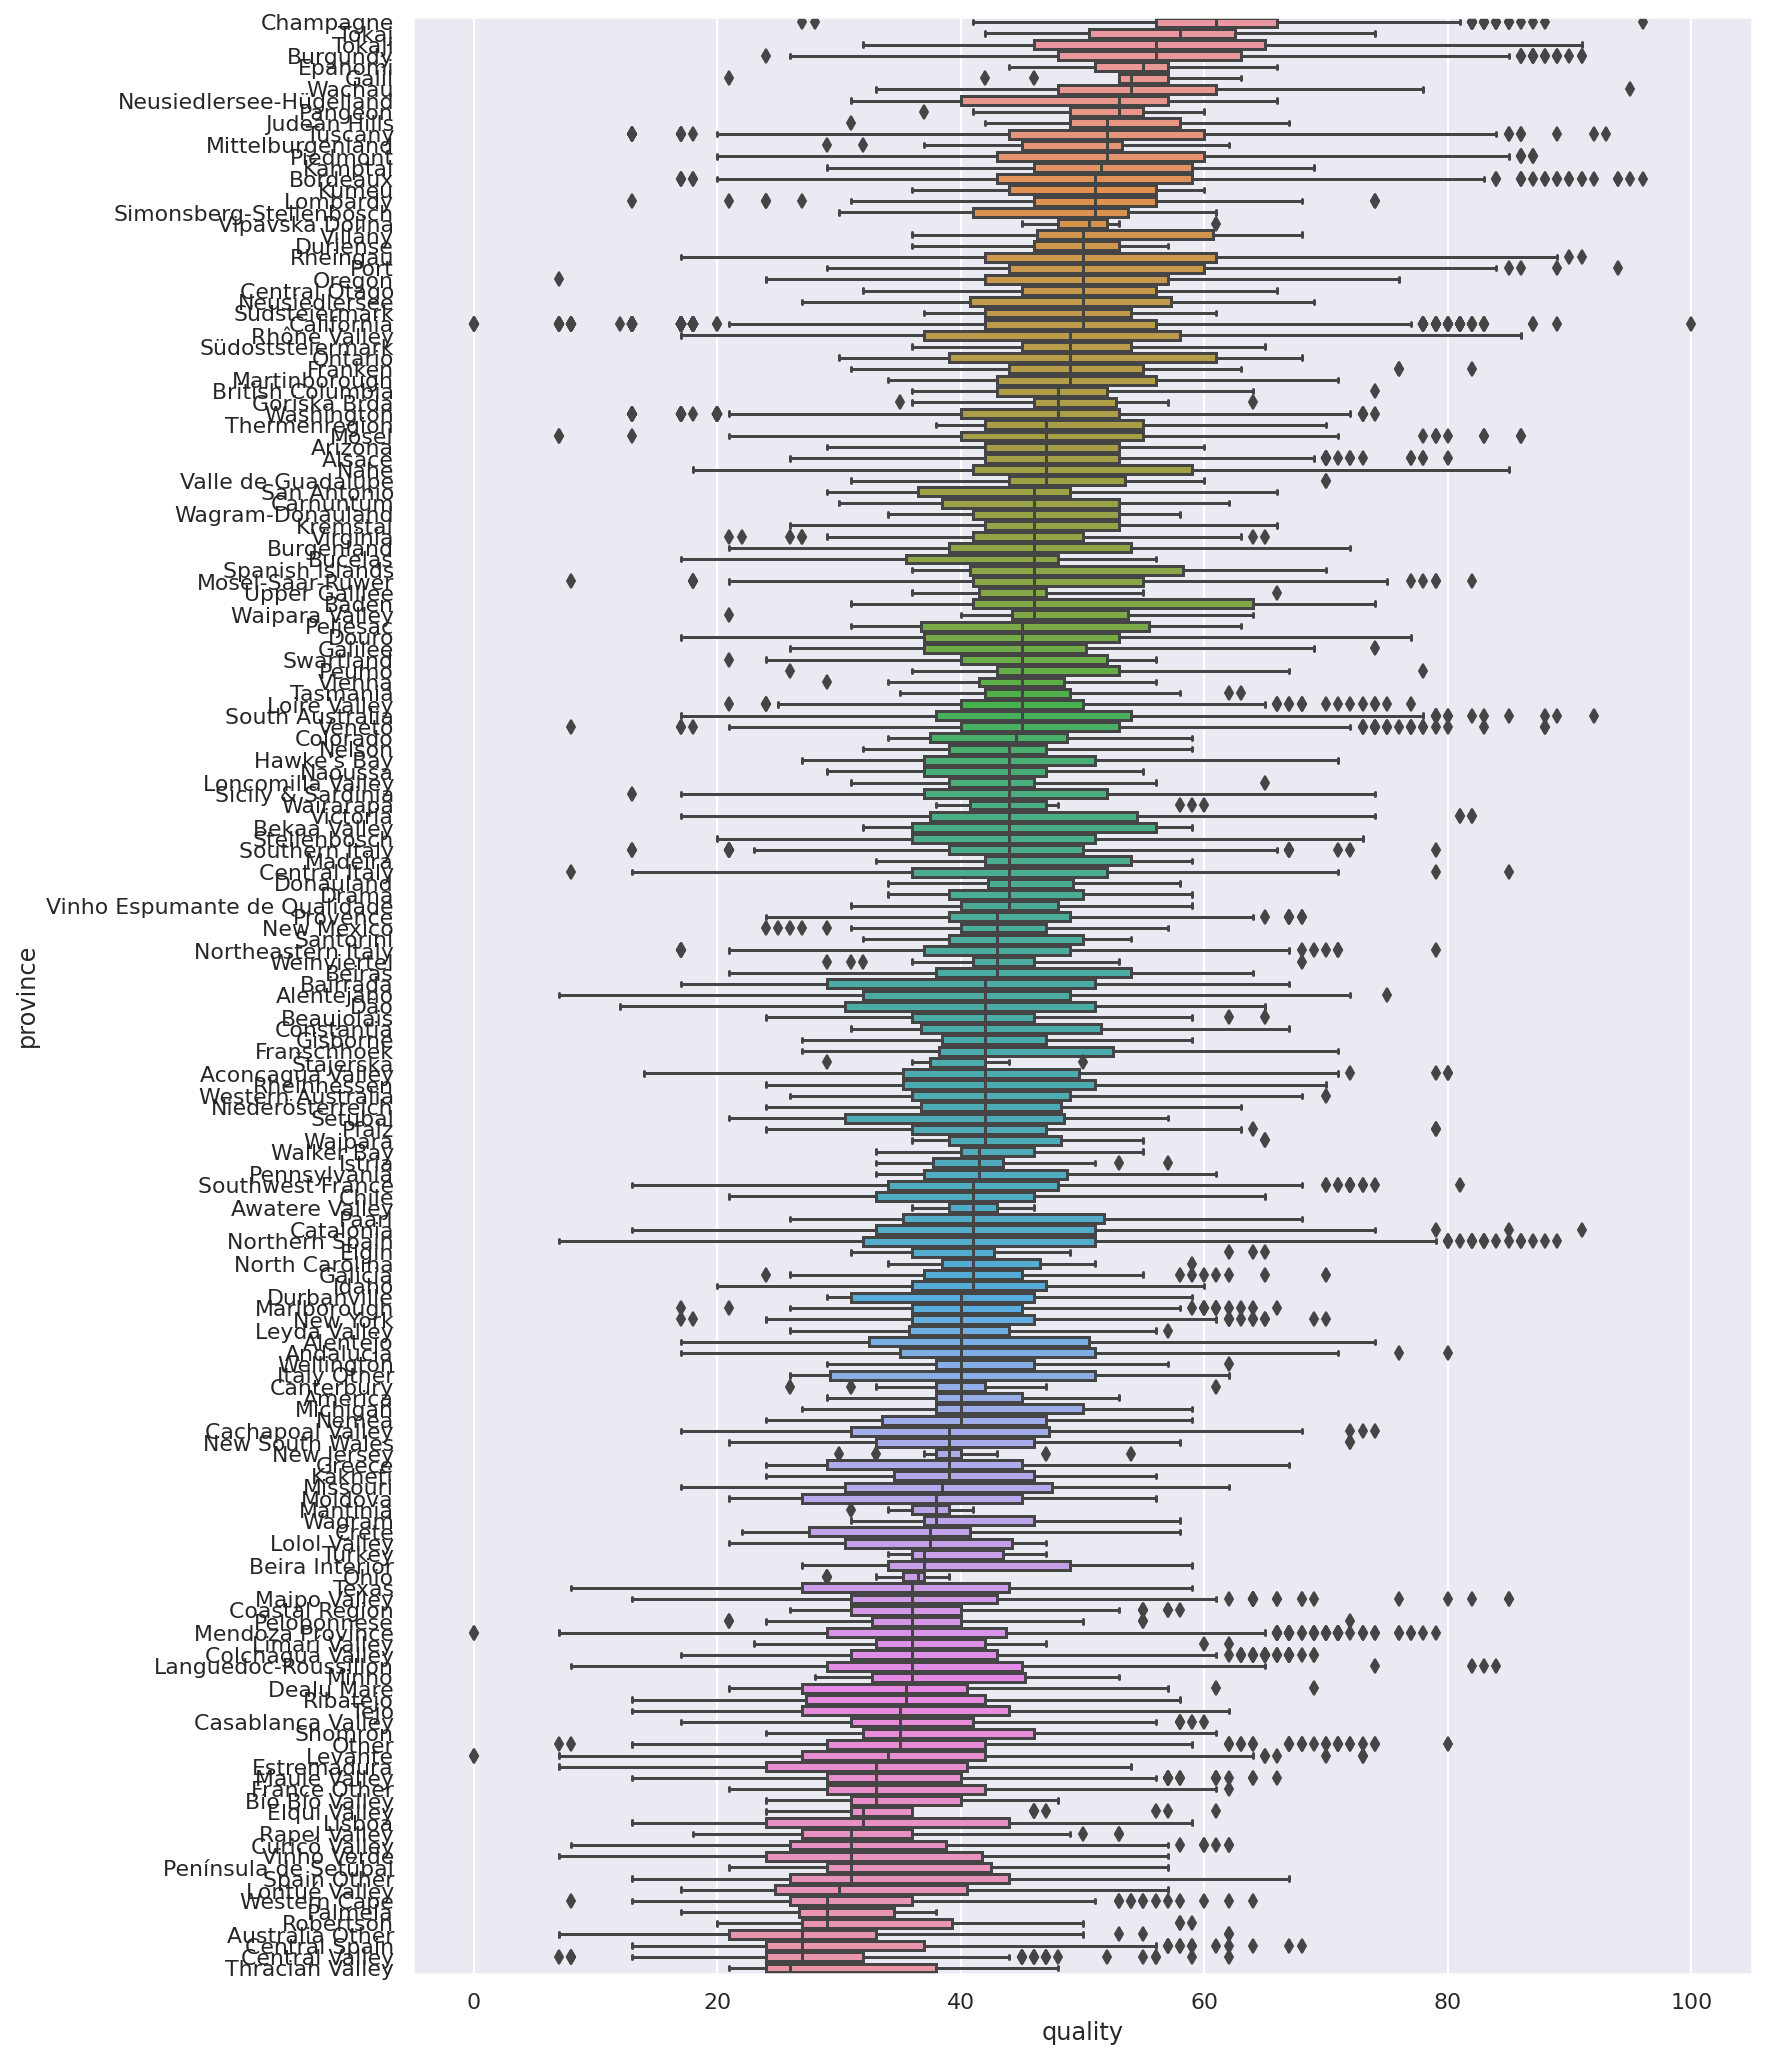

In [5]:
fig, ax = plt.subplots(figsize=(12, 18))
order =top_175_province_df.groupby(by='province').quality.median().sort_values(ascending=False).index
sns.boxplot(ax=ax, data=top_175_province_df, x='quality', y='province', order=order)

In [6]:
import statsmodels.formula.api as smf
results = smf.ols('quality ~ province', data=top_175_province_df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     114.8
Date:                Tue, 12 Jan 2021   Prob (F-statistic):               0.00
Time:                        19:29:50   Log-Likelihood:            -3.1855e+05
No. Observations:               84041   AIC:                         6.375e+05
Df Residuals:                   83866   BIC:                         6.391e+05
Df Model:                         174                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   44.3396      1.042     42.566      0.000      42.298      46.381
province[T.Alentejano]                      -3.5926      1.146     -3.134      0.002      -5.839      -1.346
province[T.Alentejo]                        -3.1672      1.551     -2.041      0.041      -6.208      -0.126
province[T.Alsace]                           3.2741      1.091      3.001      0.003       1.136       5.413
province[T.America]                         -2.6730      2.562     -1.043      0.297      -7.694       2.348
province[T.Andalucia]                       -0.8272      1.427     -0.580      0.562      -3.624       1.969
province[T.Arizona]                          2.6926      2.190      1.230      0.219      -1.599       6.985
province[T.Australia Other]                -16.2340      1.210    -13.414      0.000     -18.606     -13.862
province[T.Awatere Valley]                  -3.3396      2.959     -1.129      0.259      -9.138       2.459
province[T.Baden]                            7.4409      1.972      3.773      0.000       3.575      11.307
province[T.Bairrada]                        -3.1174      1.583     -1.970      0.049      -6.220      -0.015
province[T.Beaujolais]                      -2.7709      1.202     -2.305      0.021      -5.127      -0.415
province[T.Beira Interior]                  -4.1043      2.802     -1.465      0.143      -9.596       1.387
province[T.Beiras]                           0.9004      2.384      0.378      0.706      -3.773       5.574
province[T.Bekaa Valley]                     1.9461      2.562      0.760      0.447      -3.075       6.967
province[T.Bordeaux]                         6.7549      1.056      6.395      0.000       4.684       8.825
province[T.British Columbia]                 3.9668      1.715      2.313      0.021       0.606       7.328
province[T.Bucelas]                         -3.3396      2.876     -1.161      0.246      -8.977       2.298
province[T.Burgenland]                       2.6081      1.171      2.227      0.026       0.313       4.903
province[T.Burgundy]                        11.7314      1.063     11.034      0.000       9.648      13.815
province[T.Bío Bío Valley]                  -9.2883      2.009     -4.624      0.000     -13.225      -5.352
province[T.Cachapoal Valley]                -3.2993      1.419     -2.326      0.020      -6.080      -0.519
province[T.California]                       4.4118      1.044      4.226      0.000       2.366       6.458
province[T.Canterbury]                      -3.9021      2.876     -1.357      0.175      -9.540       1.736
province[T.Carnuntum]                        1.7130      2.028      0.845      0.398      -2.261       5.687
province[T.Casablanca Valley]  